In [1]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
import matplotlib.pyplot as plt

In [2]:
model = FaceAnalysis()
model.prepare(ctx_id=0, det_size=(640, 640))

/home/tim/.local/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:54: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/tim/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/tim/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/tim/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/tim/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/tim/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (64

In [44]:

def display_image(img):
    
    temp = img[:,:,::-1]

    plt.imshow(temp,cmap='gray')
    plt.axis('off')
    plt.show()

def get_faces(img_file):

    img = cv2.imread(img_file)
    faces = model.get(img)
    rimg = model.draw_on(img, faces)

    temp = img[:,:,::-1]
    rtemp = rimg[:,:,::-1]
    fig, ax = plt.subplots(1, 2, figsize=(18, 9))
    ax[0].imshow(temp)
    ax[0].axis('off')
    ax[1].imshow(rtemp)
    ax[1].axis('off')
    return faces[0]


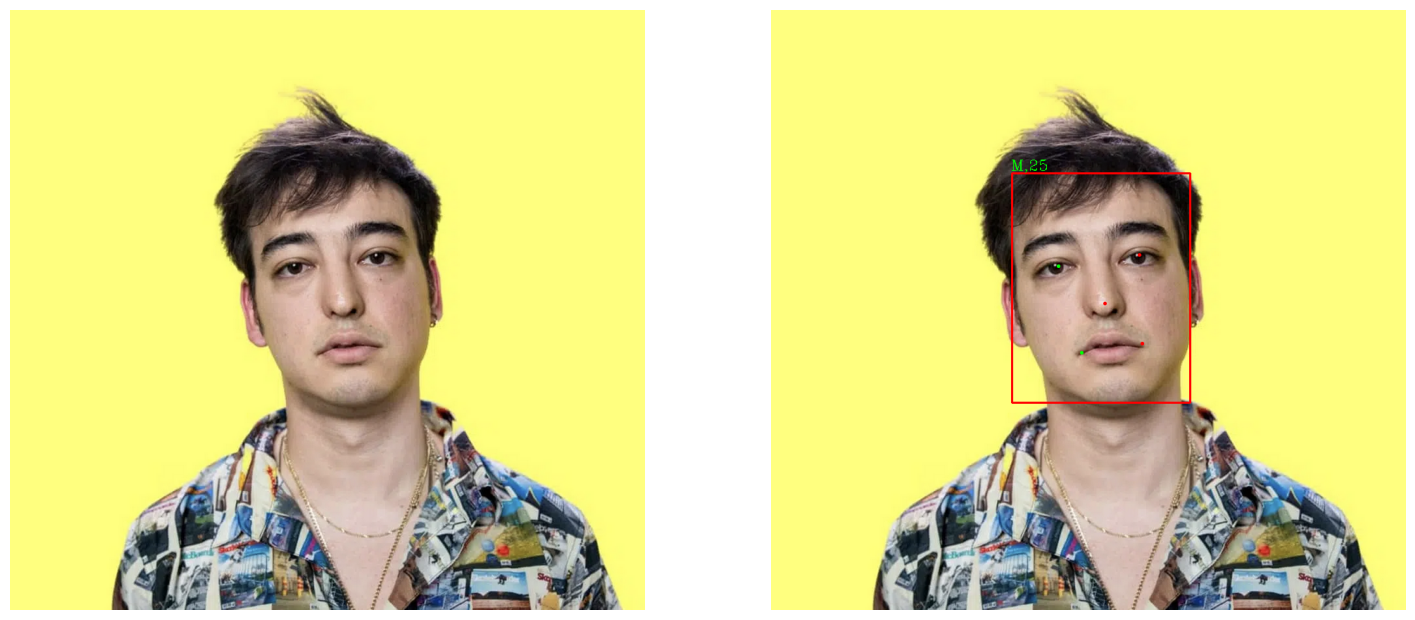

In [45]:
img_file = "./images/joji1.png"
joji1 = get_faces(img_file)

In [31]:
print(type(joji1))

<class 'insightface.app.common.Face'>


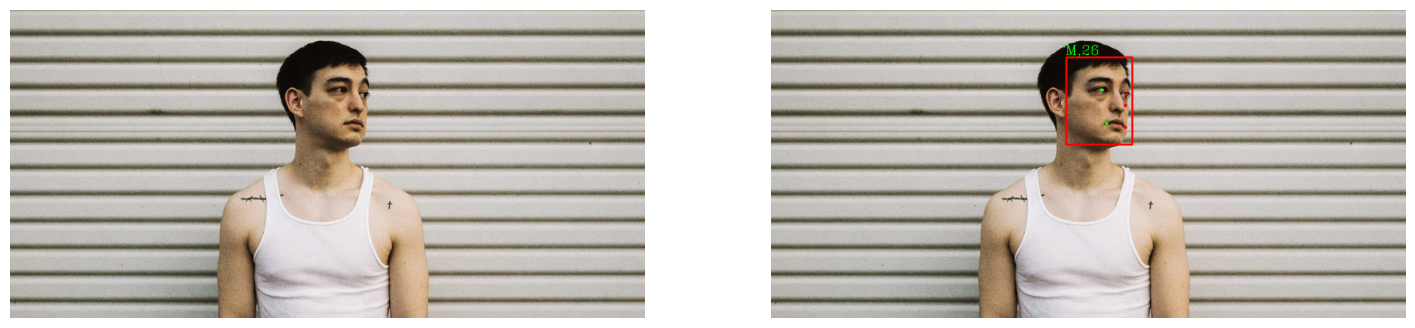

In [46]:
img_file2 = "./images/joji2.png"
joji2 = get_faces(img_file2)

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(normalized_embedding1, normalized_embedding2):

    # Reshape the embeddings as 2D arrays (required by cosine_similarity)
    reshaped_embedding1 = normalized_embedding1.reshape(1, -1)
    reshaped_embedding2 = normalized_embedding2.reshape(1, -1)

    # Calculate the cosine similarity between the embeddings
    similarity_score = cosine_similarity(reshaped_embedding1, reshaped_embedding2)

    # Convert similarity score to a percentage of similarity
    percentage_similarity = similarity_score[0][0] * 100

    # Print the percentage of similarity
    print(f"The faces are {percentage_similarity}% similar.")

In [48]:
def compare_faces(img_file1, img_file2):
    face1 = get_faces(img_file1)
    face2 = get_faces(img_file2)

    norm_embed1 = face1.normed_embedding
    norm_embed2 = face2.normed_embedding

    calculate_similarity(norm_embed1, norm_embed2)


/home/tim/.local/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The faces are 100.0% similar.


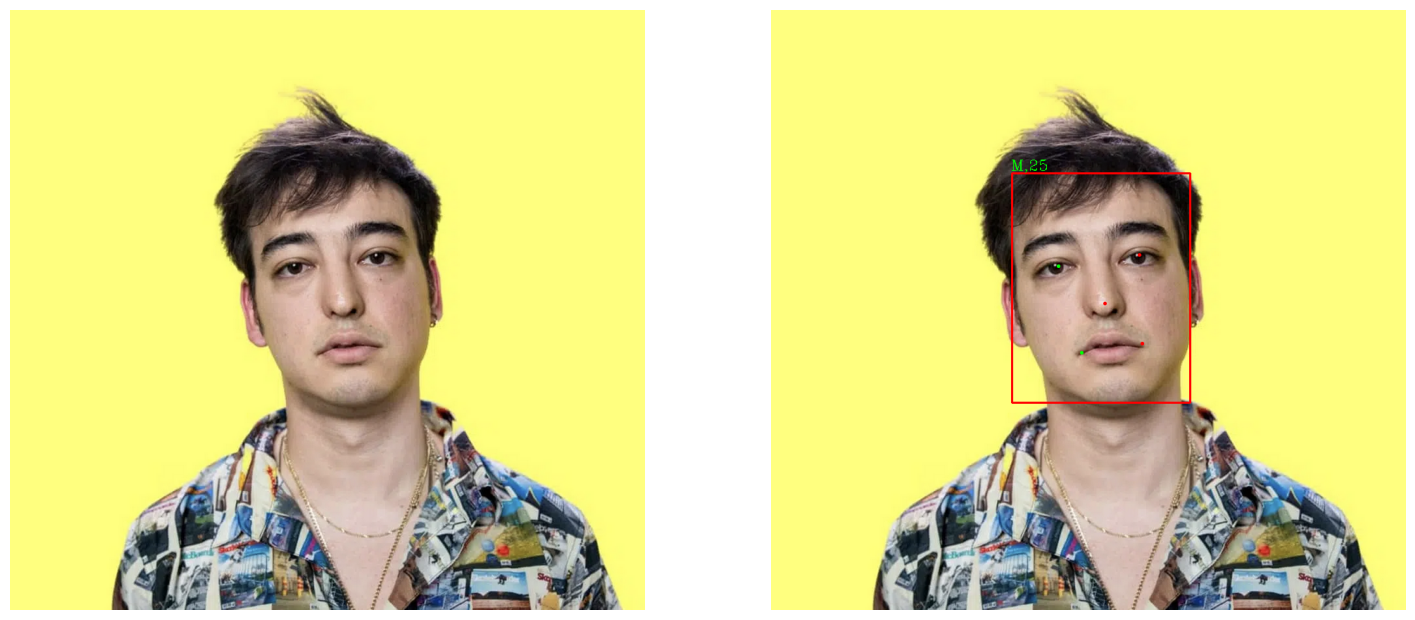

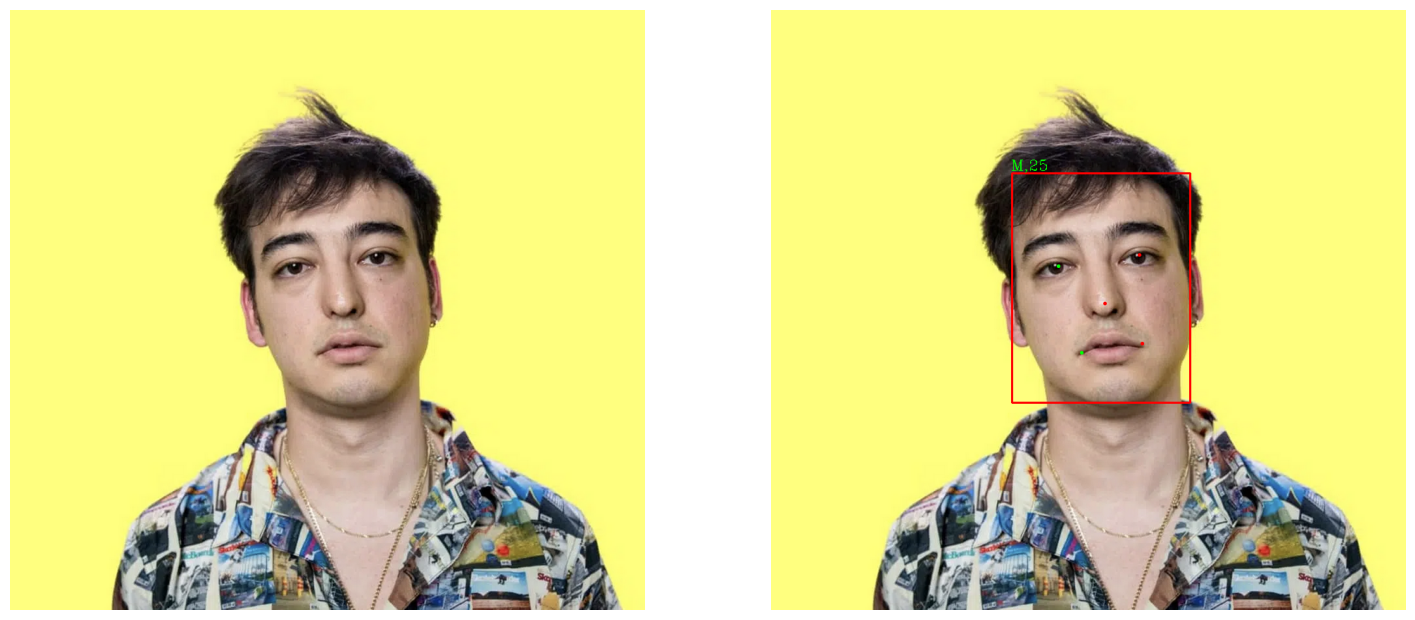

In [50]:
file1 = "./images/joji1.png"
file2 = "./images/joji2.png"

compare_faces(file1, file1)